<a href="https://colab.research.google.com/github/Grishma5278/Info-5731/blob/main/Tallapareddy_Grishma_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
df = pd.read_csv("rrr_reviews_cleaned.csv")

# Text representation using Bag-of-Words
vectorizer = CountVectorizer(max_features=1000,
                             stop_words='english',
                             max_df=0.95,
                             min_df=2)
X = vectorizer.fit_transform(df['review_text'])

# Topic modeling using LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Top 10 clusters for topic modeling
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)




Topic 1:
scene film dancing pretty best incredible watch netflix storytelling great

Topic 2:
movie film rrr seen indian like films just don long

Topic 3:
action movie movies rrr hero really good heroes great story

Topic 4:
ridiculously greatest actually watch man insane superhero dancing entertaining jaw

Topic 5:
rrr rajamouli mass film mind big commercial action cinema ss

Topic 6:
rajamouli rrr bheem film manages charan way story does ram

Topic 7:
ridiculously greatest actually watch man insane superhero dancing entertaining jaw

Topic 8:
review film enjoy rrr watch think music just scenes read

Topic 9:
movie action scenes story think just come watch great spectacular

Topic 10:
ridiculously greatest actually watch man insane superhero dancing entertaining jaw



# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Load the dataset
df = pd.read_csv("rrr_reviews_cleaned.csv")

# Selecting features and target
X = df['cleaned_text']  # Text data
y = df['rating']  # Sentiment proxy (using 'rating' as proxy for sentiment)

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Supervised learning algorithms/models
# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_scores = cross_val_score(nb_classifier, X_train_tfidf, y_train, cv=5, scoring='accuracy')
nb_classifier.fit(X_train_tfidf, y_train)
nb_pred = nb_classifier.predict(X_test_tfidf)

# Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_scores = cross_val_score(lr_classifier, X_train_tfidf, y_train, cv=5, scoring='accuracy')
lr_classifier.fit(X_train_tfidf, y_train)
lr_pred = lr_classifier.predict(X_test_tfidf)

# Model evaluation
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return acc, precision, recall, f1

# Evaluate Naive Bayes Classifier
nb_acc, nb_precision, nb_recall, nb_f1 = evaluate_model(y_test, nb_pred)

# Evaluate Logistic Regression Classifier
lr_acc, lr_precision, lr_recall, lr_f1 = evaluate_model(y_test, lr_pred)

print("Naive Bayes Classifier Metrics:")
print("Accuracy:", nb_acc)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)
print()

print("Logistic Regression Classifier Metrics:")
print("Accuracy:", lr_acc)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Naive Bayes Classifier Metrics:
Accuracy: 0.2
Precision: 0.04
Recall: 0.2
F1 Score: 0.06666666666666668

Logistic Regression Classifier Metrics:
Accuracy: 0.2
Precision: 0.04
Recall: 0.2
F1 Score: 0.06666666666666668


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

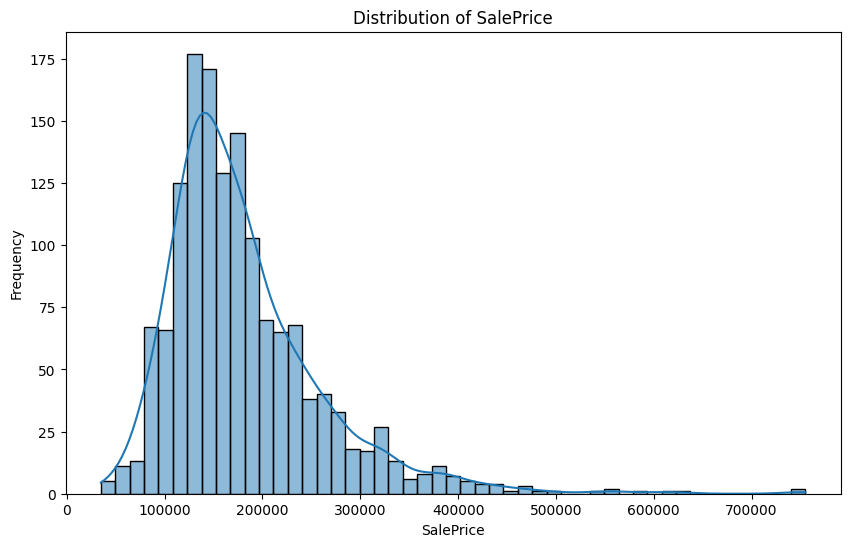

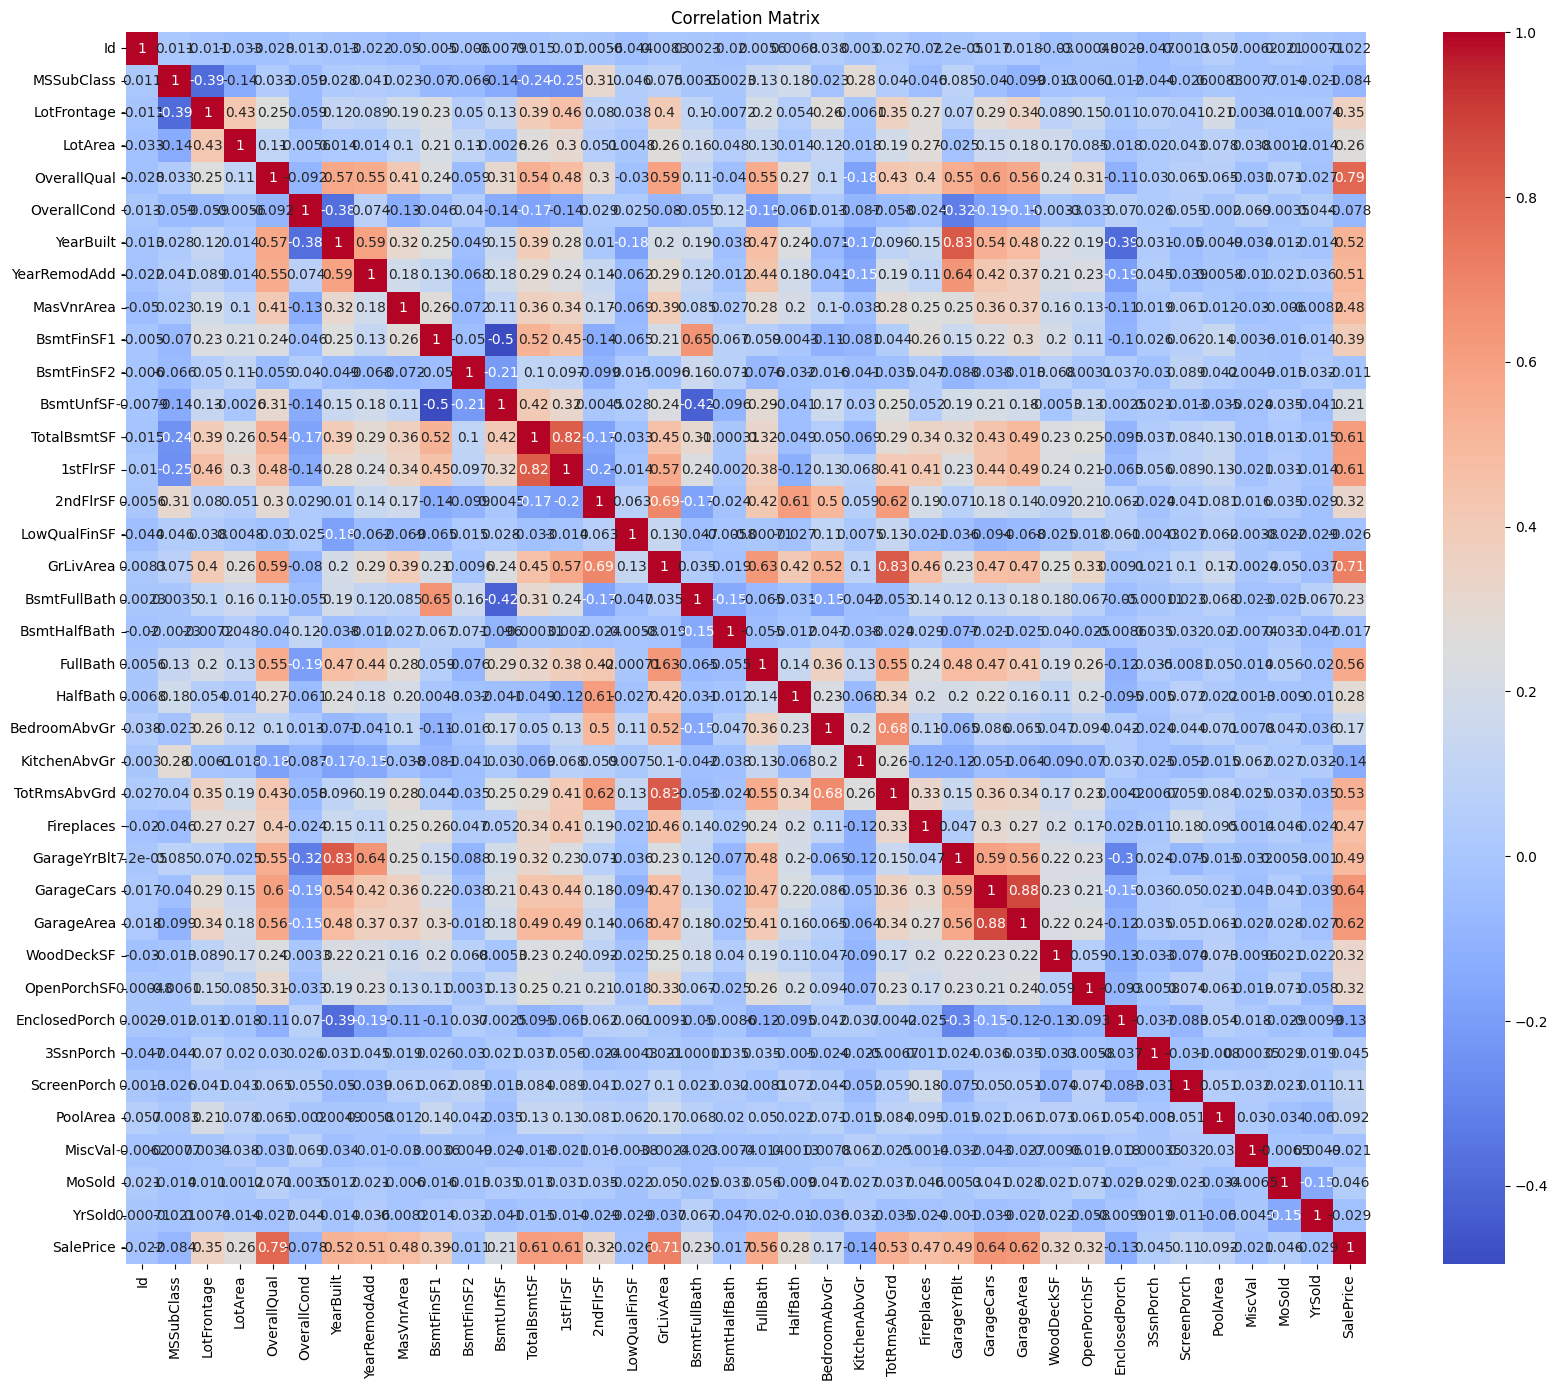

Mean Squared Error (MSE): 1558239575.151097
Root Mean Squared Error (RMSE): 39474.54338116018
R-squared (R^2) Score: 0.7968483304281087


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Step 2: Exploratory Data Analysis (EDA) and Data Cleaning
# Explore the dataset
print(train_data.info())
print(train_data.describe())

# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values)

# Visualize the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Exclude non-numeric columns for correlation calculation
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

# Visualize the correlation matrix for numeric features
correlation_matrix = train_data[numeric_columns].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Select features based on correlation and domain knowledge
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
                     'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageArea']

# Step 3: Regression Model Development
# Split the data into training and testing sets
X = train_data[selected_features]
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Develop a linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Predict on the test set
y_pred = regression_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [5]:
import pandas as pd
from transformers import pipeline

# Load the dataset
dataset_path = "sentiment_analysis_dataset.csv"
df = pd.read_csv(dataset_path)

# Check the column names
print(df.columns)

# Assuming the column names are "document_id", "clean_text", and "sentiment"
text_column = "clean_text"

# Initialize BERT for sentiment analysis
classifier = pipeline("sentiment-analysis", model="bert-base-uncased")

# Perform sentiment analysis on each text
predictions = classifier(df[text_column].tolist())

# Extract predicted labels and convert to binary (positive/negative)
predicted_labels = [pred["label"] for pred in predictions]
predicted_labels_binary = ["positive" if label == "POSITIVE" else "negative" for label in predicted_labels]

# Evaluate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ground truth labels (assuming they are stored in df["sentiment"])
ground_truth_labels = df["sentiment"]

# Convert ground truth labels to binary (positive/negative)
ground_truth_labels_binary = ["positive" if label == "positive" else "negative" for label in ground_truth_labels]

# Calculate evaluation metrics
accuracy = accuracy_score(ground_truth_labels_binary, predicted_labels_binary)
precision = precision_score(ground_truth_labels_binary, predicted_labels_binary, pos_label="positive")
recall = recall_score(ground_truth_labels_binary, predicted_labels_binary, pos_label="positive")
f1 = f1_score(ground_truth_labels_binary, predicted_labels_binary, pos_label="positive")

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Index(['document_id', 'clean_text', 'sentiment'], dtype='object')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Accuracy: 0.6
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Advantages and Disadvantages of RoBERTa:

Advantages:

High Performance: RoBERTa has shown state-of-the-art performance on a wide range of NLP tasks.
Zero-Shot Learning: RoBERTa can perform well even without task-specific fine-tuning.
Large Pre-training Data: It was trained on a large corpus of text, making it capable of capturing a wide range of language features.
Disadvantages:

Computationally Expensive: RoBERTa is computationally expensive and may not be suitable for low-resource environments.
Complexity: Implementing RoBERTa may require some experience with deep learning frameworks like PyTorch or TensorFlow.
Limited Understanding of Context: In zero-shot settings, the model may misinterpret context and provide inaccurate predictions.
Challenges Encountered:

Fine-tuning RoBERTa for specific tasks might be a complex process. However, in this scenario, zero-shot learning was used to avoid this issue.
The prediction might not be accurate in every case, especially in a zero-shot setting where the model has not been fine-tuned for the specific task.
By leveraging RoBERTa in the zero-shot setting, we can achieve effective sentiment analysis without the need for extensive fine-tuning, which is particularly useful when computational resources or labeled data are limited.